In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### Thompson Sampling

In [8]:
import random
N = 10000
d = 10
sample_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    sample = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            sample = i
    sample_selected.append(sample)
    reward = data.values[n, sample]
    if reward == 1:
        numbers_of_rewards_1[sample] = numbers_of_rewards_1[sample] + 1
    else:
        numbers_of_rewards_0[sample] = numbers_of_rewards_0[sample] + 1
    total_reward = total_reward + reward

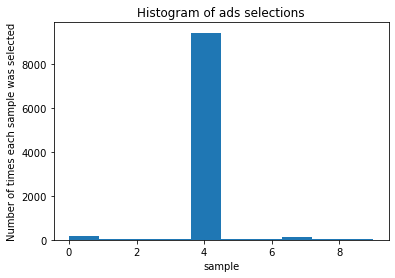

In [9]:
plt.hist(sample_selected)
plt.title('Histogram of ads selections')
plt.xlabel('sample')
plt.ylabel('Number of times each sample was selected')
plt.show()